# UAS Teknik Visualisasi Data

## Import Module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, mode
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Read Data From CSV File

In [5]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

## Read The First 5 Data

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Correlation Analysis of Unit Price and Quantity

In [7]:
korelasi = pearsonr(df['Unit price'], df['Quantity'])
print(korelasi.statistic)

0.010777564342497277


## Correlation Analysis of Unit Price and Tax 5%

In [8]:
korelasi = pearsonr(df['Unit price'], df['Tax 5%'])
print(korelasi.statistic)

0.6339620885890692


## Correlation Analysis of Unit Price and Total

In [9]:
korelasi = pearsonr(df['Unit price'], df['Total'])
print(korelasi.statistic)

0.6339620885890692


## Correlation Analysis of Unit Price and COGS

In [10]:
korelasi = pearsonr(df['Unit price'], df['cogs'])
print(korelasi.statistic)

0.6339620885890692


## Correlation Analysis of Quantity and Tax 5%

In [11]:
korelasi = pearsonr(df['Quantity'], df['Tax 5%'])
print(korelasi.statistic)

0.7055101859433069


## Correlation Analysis of Quantity and Total

In [12]:
korelasi = pearsonr(df['Quantity'], df['Total'])
print(korelasi.statistic)

0.705510185943307


## Correlation Analysis of Quantity and COGS

In [13]:
korelasi = pearsonr(df['Quantity'], df['cogs'])
print(korelasi.statistic)

0.7055101859433069


## Correlation Analysis of COGS and TAX

In [14]:
korelasi = pearsonr(df['cogs'], df['Tax 5%'])
print(korelasi.statistic)

1.0


## Correlation Analysis of COGS and Total

In [15]:
korelasi = pearsonr(df['cogs'], df['Total'])
print(korelasi.statistic)

1.0


## Setelah dilakukan analisis korelasi antara variabel 'Unit price', 'Quantity', 'Tax 5%', dan 'Total' ditemukan bahwa:
## 1. Variabel 'Unit price' dan 'Quantity' berkorelasi sangat lemah
## 2. Variabel 'Unit price' dan 'Tax 5%' berkorelasi sedang (moderat)
## 3. Variabel 'Unit price' dan 'Total' berkorelasi sedang (moderat)
## 4. Variabel 'Unit price' dan 'COGS' berkorelasi sedang (moderat)
## 5. Variabel 'Quantity' dan 'Tax 5%' berkorelasi kuat
## 6. Variabel 'Quantity' dan 'Total' berkorelasi kuat
## 7. Variabel 'Quantity' dan 'COGS' berkorelasi kuat
## 8. Variabel 'COGS' dan 'TAX' berkorelasi sangat kuat
## 9. Variabel 'COGS' dan 'Total' berkorelasi sangat kuat

## Untuk dimensi yang harus direduksi atau dihilangkan adalah dimensi 'gross margin percentage' dan 'gross income',
## karena dimensi 'gross margin percentage' memiliki data yang sama di semua records
## dan dimensi 'gross income' memiliki data yang sama dengan dimensi 'Tax 5%' (redundant).
## sehingga dimensi 'gross income' dapat dihapus, karena sudah terwakilkan oleh dimensi 'Tax 5%'

## Classification Analysis for All Fields

In [16]:
# Pilih fitur dan target
features = df[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'Rating']]
target = df['Payment']

In [17]:
# Bagi data menjadi data latih dan data uji
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
# Latih model
model.fit(features_train, target_train)

RandomForestClassifier(random_state=42)

In [20]:
# Prediksi target data uji
target_pred = model.predict(features_test)

In [21]:
# Hitung akurasi
accuracy = accuracy_score(target_test, target_pred)

print(f'Akurasi model: {accuracy * 100}%')

Akurasi model: 28.499999999999996%


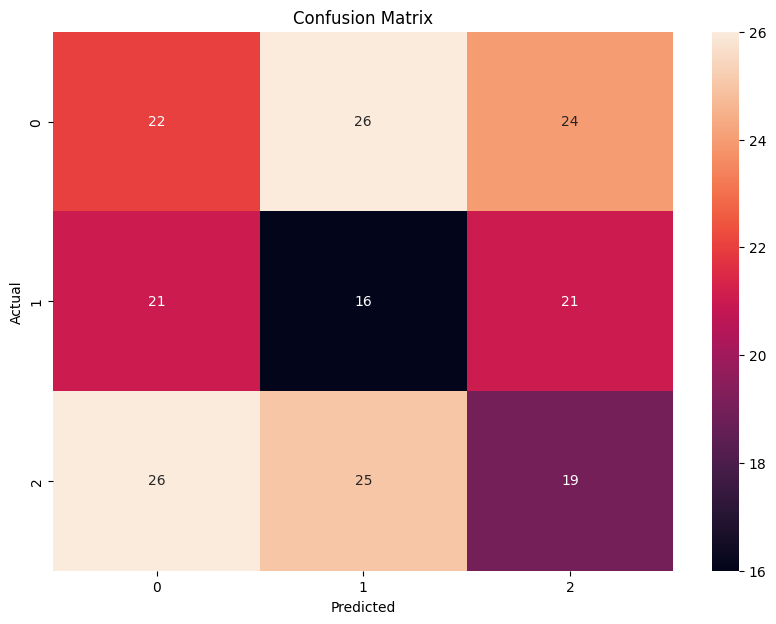

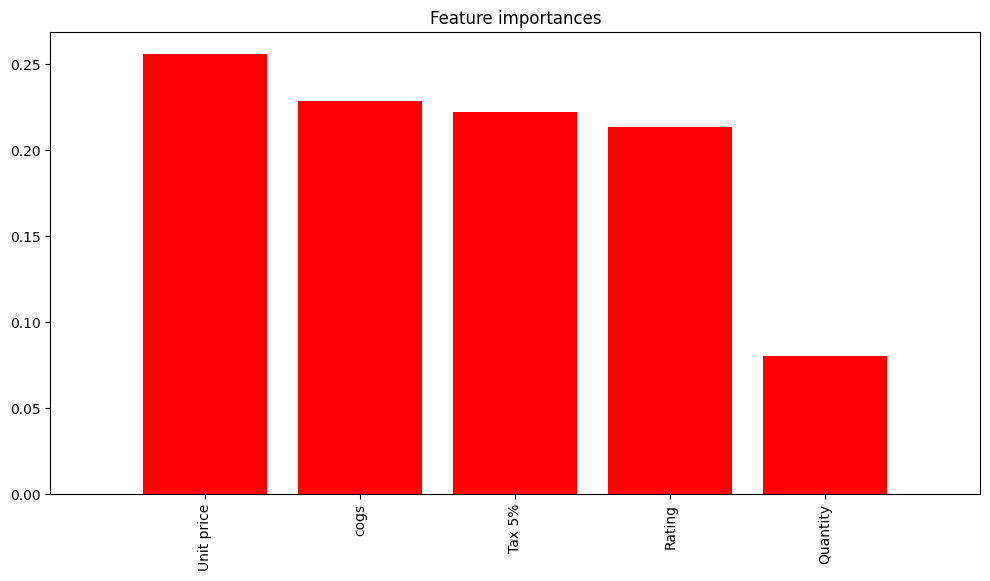

In [36]:
# Hitung matriks kebingungan
conf_matrix = confusion_matrix(target_test, target_pred)

# Buat plot matriks kebingungan
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Buat plot pentingnya fitur
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), features.columns[indices], rotation='vertical')
plt.xlim([-1, features.shape[1]])
plt.show()


## Remove The 'gross margin percentage' Dimension

In [23]:
df = df.drop(columns=['gross margin percentage'])
df = df.drop(columns=['gross income'])

In [24]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3


#  Unit Price (Mean, Median, Modus)

In [25]:
unit_price_mean = np.mean(df['Unit price'])
unit_price_median = np.median(df['Unit price'])
unit_price_modus = mode(df['Unit price'])

print(f'Unit Price Mean: {unit_price_mean}')
print(f'Unit Price Median: {unit_price_median}')
print(f'Unit Price Modus: {unit_price_modus.mode}')

Unit Price Mean: 55.67213
Unit Price Median: 55.230000000000004
Unit Price Modus: 83.77


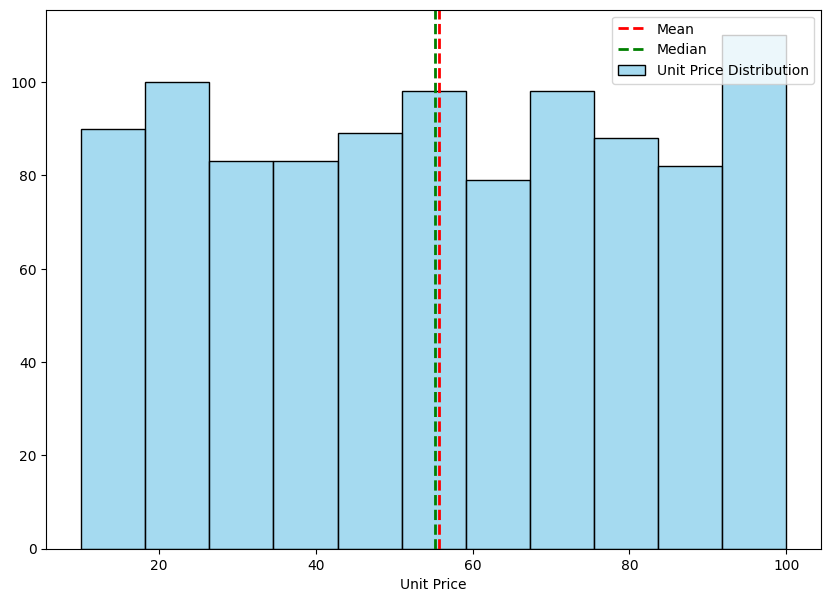

In [26]:
# Visualisasi
plt.figure(figsize=(10, 7))

# Histogram
sns.histplot(df['Unit price'], color='skyblue', label='Unit Price Distribution')

# Garis vertikal untuk mean, median, dan modus
plt.axvline(unit_price_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(unit_price_median, color='green', linestyle='dashed', linewidth=2, label='Median')

# Menambahkan label dan legenda
plt.xlabel('Unit Price')
plt.ylabel('')
plt.legend()

# Menampilkan plot
plt.show()

# Quantity (Mean, Median, Modus)

In [27]:
quantity_mean = np.mean(df['Quantity'])
quantity_median = np.median(df['Quantity'])
quantity_modus = mode(df['Quantity'])

print(f'Quantity Mean: {quantity_mean}')
print(f'Quantity Median: {quantity_median}')
print(f'Quantity Modus: {quantity_modus.mode}')

Quantity Mean: 5.51
Quantity Median: 5.0
Quantity Modus: 10


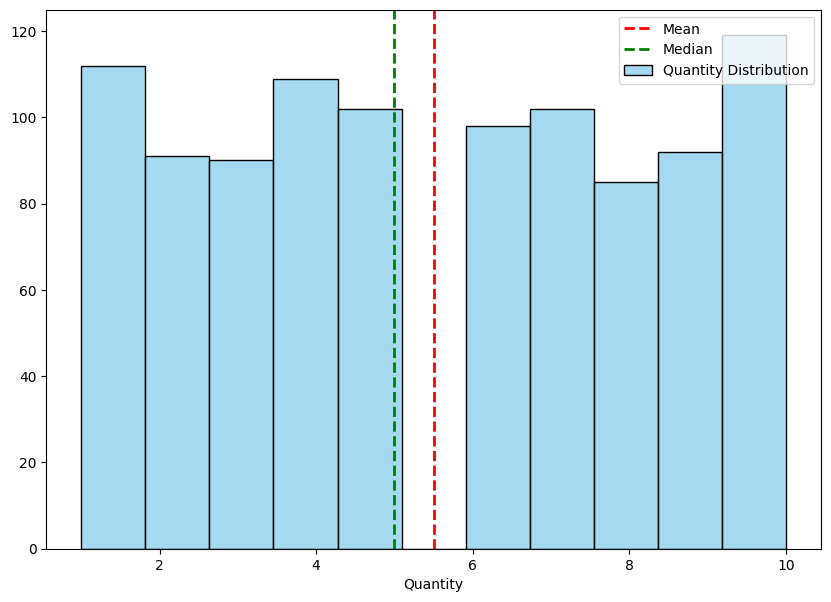

In [28]:
# Visualisasi
plt.figure(figsize=(10, 7))

# Histogram
sns.histplot(df['Quantity'], color='skyblue', label='Quantity Distribution')

# Garis vertikal untuk mean, median, dan modus
plt.axvline(quantity_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(quantity_median, color='green', linestyle='dashed', linewidth=2, label='Median')

# Menambahkan label dan legenda
plt.xlabel('Quantity')
plt.ylabel('')
plt.legend()

# Menampilkan plot
plt.show()

# Tax 5% (Mean, Median, Modus)

In [29]:
tax_mean = np.mean(df['Tax 5%'])
tax_median = np.median(df['Tax 5%'])
tax_modus = mode(df['Tax 5%'])

print(f'Tax 5% Mean: {tax_mean}')
print(f'Tax 5% Median: {tax_median}')
print(f'Tax 5% Modus: {tax_modus.mode}')

Tax 5% Mean: 15.379368999999999
Tax 5% Median: 12.088000000000001
Tax 5% Modus: 4.154


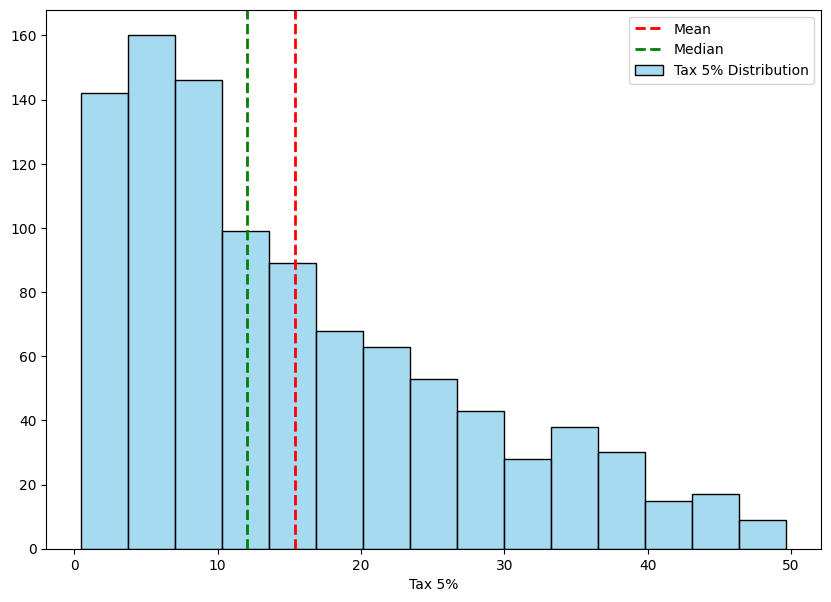

In [30]:
# Visualisasi
plt.figure(figsize=(10, 7))

# Histogram
sns.histplot(df['Tax 5%'], color='skyblue', label='Tax 5% Distribution')

# Garis vertikal untuk mean, median, dan modus
plt.axvline(tax_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(tax_median, color='green', linestyle='dashed', linewidth=2, label='Median')

# Menambahkan label dan legenda
plt.xlabel('Tax 5%')
plt.ylabel('')
plt.legend()

# Menampilkan plot
plt.show()

# Total (Mean, Median, Modus)

In [31]:
total_mean = np.mean(df['Total'])
total_median = np.median(df['Total'])
total_modus = mode(df['Total'])

print(f'Total Mean: {total_mean}')
print(f'Total Median: {total_median}')
print(f'Total Modus: {total_modus.mode}')

Total Mean: 322.966749
Total Median: 253.848
Total Modus: 87.234


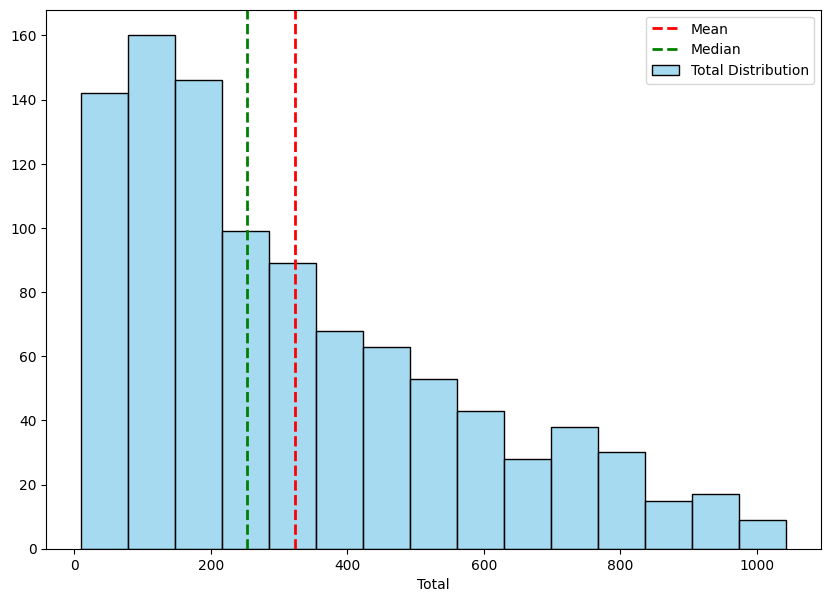

In [32]:
# Visualisasi
plt.figure(figsize=(10, 7))

# Histogram
sns.histplot(df['Total'], color='skyblue', label='Total Distribution')

# Garis vertikal untuk mean, median, dan modus
plt.axvline(total_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(total_median, color='green', linestyle='dashed', linewidth=2, label='Median')

# Menambahkan label dan legenda
plt.xlabel('Total')
plt.ylabel('')
plt.legend()

# Menampilkan plot
plt.show()

# COGS - Cost of Goods Sold (Mean, Median, Modus)

In [33]:
cogs_mean = np.mean(df['cogs'])
cogs_median = np.median(df['cogs'])
cogs_modus = mode(df['cogs'])

print(f'COGS Mean: {cogs_mean}')
print(f'COGS Median: {cogs_median}')
print(f'COGS Modus: {cogs_modus.mode}')

COGS Mean: 307.58738
COGS Median: 241.76
COGS Modus: 83.08


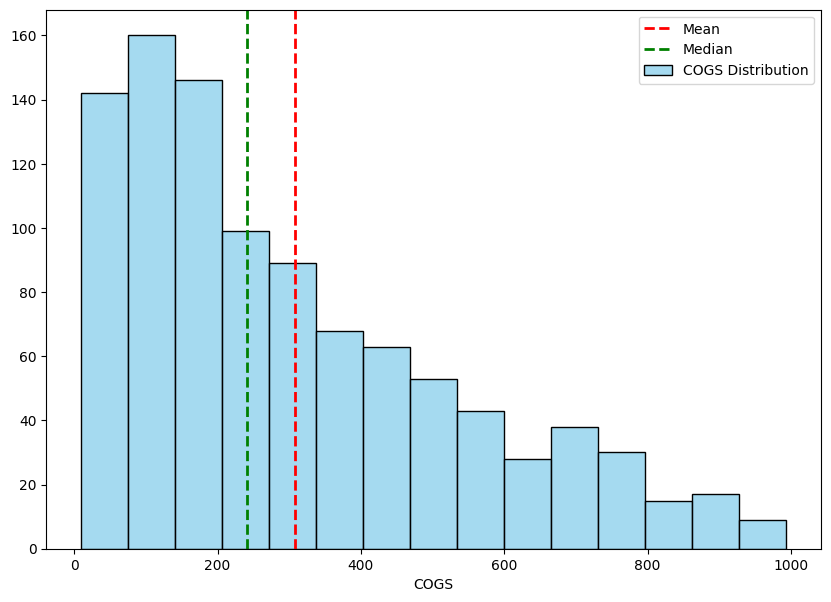

In [34]:
# Visualisasi
plt.figure(figsize=(10, 7))

# Histogram
sns.histplot(df['cogs'], color='skyblue', label='COGS Distribution')

# Garis vertikal untuk mean, median, dan modus
plt.axvline(cogs_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(cogs_median, color='green', linestyle='dashed', linewidth=2, label='Median')

# Menambahkan label dan legenda
plt.xlabel('COGS')
plt.ylabel('')
plt.legend()

# Menampilkan plot
plt.show()

In [35]:
df['date'] = pd.to_datetime(df['Date'])

# Memastikan bahwa data terurut berdasarkan tanggal
df = df.sort_values(by='date')

# Membuat DataFrame baru dengan kolom 'quantity' dijumlahkan per bulan
monthly_df = df.resample('ME', on='date').sum()
print(monthly_df.Quantity)

# Atur ukuran font global untuk visualisasi Matplotlib dan Seaborn
plt.rcParams.update({'font.size': 14})  # Ubah ukuran font sesuai kebutuhan

# Visualisasi dengan Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_df.index, y='Quantity', data=monthly_df, marker='o', label='Quantity')
plt.title('Penjualan Tahun 2019 Pada Bulan Februari - April')
plt.xlabel('Bulan')
plt.ylabel('Total Kuantitas per Bulan')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotasi dan perataan label tanggal
plt.tight_layout()
plt.show()

ValueError: Invalid frequency: ME